In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv("D:/Self Data Science learning/ML/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [90]:
df.shape

(550068, 12)

In [91]:
df.select_dtypes(exclude=object).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
dtype: int64

here we see that there are 173638 null values in product_category_2 and 383247 null values in product_category_2



# Let's visualize it 

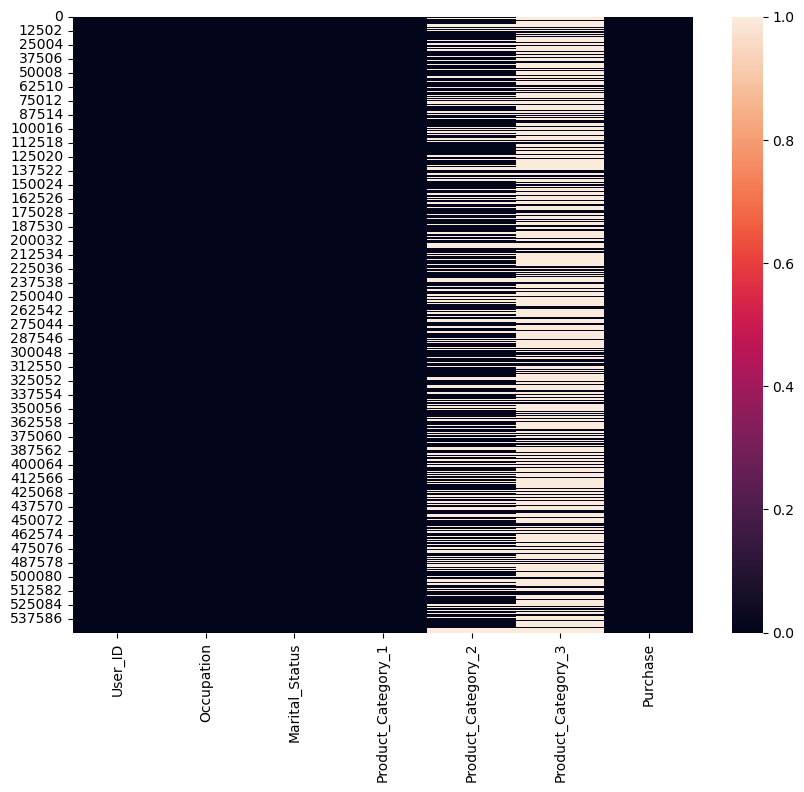

In [92]:
#creating a heat map to visualize the null values
plt.figure(figsize=(10,8))
sns.heatmap(data=df.select_dtypes(exclude=object).isnull()) 
plt.show()

In this graph we clealry see that there are null values present in product_category_2 and product_category_3

Here we use mean, median and mode technique to replace missing values and check which one is best for our data set

# Product_Category_2 Column

# Use Mean to replace null values

In [93]:
mean_value=int(df['Product_Category_2'].mean())   #here we find mean value and we use int bcz we do not want float value

In [94]:
mean_value

9

In [95]:
'Product_Category_2'+"_mean_replaced"   #here we check if we write 2 string ang joint it with + operator then what's the result

'Product_Category_2_mean_replaced'

In [96]:
def replacement(df,col,value,tec_name):
    df[col+tec_name+'_replaced'] = df[col].fillna(value)   #here we write a code, that will fill all the null values to which value we pass in object (mean,median or mode)
    
    

In [97]:
replacement(df,'Product_Category_2',mean_value,'_mean')     #here we create the object and call the function

In [98]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9.0


Here we see that a new column is created, named Product_Category_2_mean_replaced

Now we check, is this any null value present in the new column or not.

In [99]:
df['Product_Category_2_mean_replaced'].isnull().sum()

0

In [100]:
#there is no null values bcz we replace it with mean

In [101]:
# we replaced 173638 null values with mean value 9 so is it best replacement or not:
# we need to check the statastical graphs 


# let's visualize 

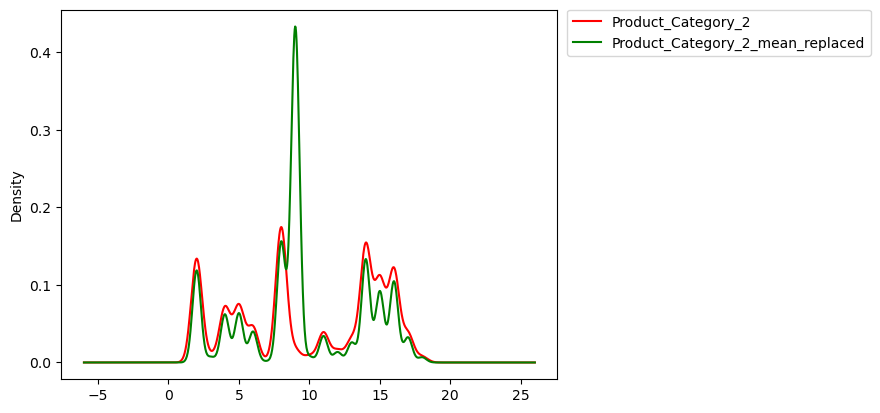

In [102]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_2'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_2') # before filling null values
df['Product_Category_2_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [39]:
#here we see that bcz we replace 173638 values to mean 9, so it will look like this at point 9 in graph


# Using Median to replace null values

In [104]:
median_value=int(df['Product_Category_2'].median())   #here we find median value and we use int bcz we do not want float value

In [105]:
median_value

9

In [106]:
# call the function from there 
replacement(df,'Product_Category_2',median_value,'_median')

In [107]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean_replaced,Product_Category_2_median_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9.0,9.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9.0,9.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9.0,9.0


Here we see that a new column is created, named Product_Category_2_median_replaced

Now we check, is this any null value present in the new column or not.

In [108]:
df['Product_Category_2_median_replaced'].isnull().sum()

0

There is no null values presnt in new column and we notice that our mean and median value is same.

# let's visualize

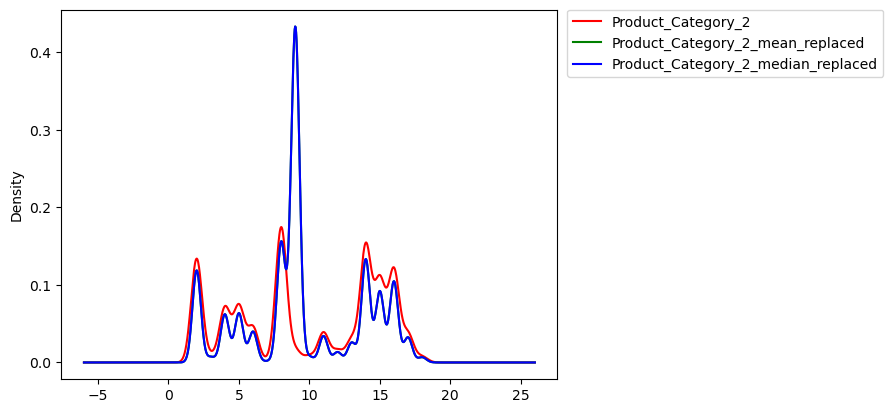

In [109]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_2'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_2') # before filling null values
df['Product_Category_2_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_2_mean_replaced')# after filling null values with mean value
df['Product_Category_2_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Product_Category_2_median_replaced')# after filling null values with median value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

Our mean and median is same, so in graph median overlap mean graph line and both looks like this at point 9

# Using Mode to replace null values

In [110]:
mode_value=int(df['Product_Category_2'].mode())   #here we find mode value and we use int bcz we do not want float value

In [111]:
mode_value

8

In [112]:
# call the function from there 
replacement(df,'Product_Category_2',mode_value,'_mode')

In [113]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean_replaced,Product_Category_2_median_replaced,Product_Category_2_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9.0,9.0,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0,6.0,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9.0,9.0,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0,14.0,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9.0,9.0,8.0


Now we replaced all null values with median 8 and create a new column naame Product_Category_2_mode_replaced. Now we check is there any null values or not

In [114]:
df['Product_Category_2_mode_replaced'].isnull().sum()

0

In [115]:
#There is no null values

# Let's Visualize

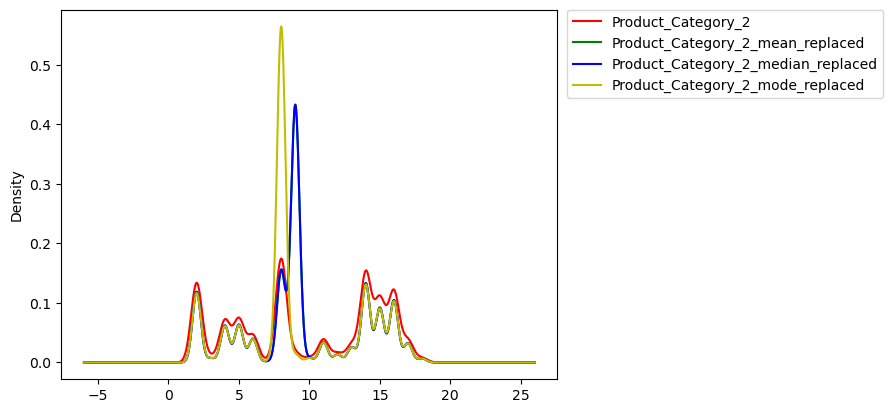

In [116]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_2'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_2') # before filling null values
df['Product_Category_2_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_2_mean_replaced')# after filling null values with mean value
df['Product_Category_2_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Product_Category_2_median_replaced')# after filling null values with median value
df['Product_Category_2_mode_replaced'].plot(kind='kde',ax=ax,color='y',legend='Product_Category_2_mode_replaced')# after filling null values with median value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [ ]:
#here we see the graph 

In [57]:
# know we find the std for all the techniques along with original column 


print('original column std = ',df['Product_Category_2'].std())
print('mean std = ',df['Product_Category_2_mean_replaced'].std())
print('median std = ',df['Product_Category_2_median_replaced'].std())
print('mode std = ',df['Product_Category_2_mode_replaced'].std())


original column std =  5.08658964870293
mean std =  4.226025174967703
median std =  4.226025174967703
mode std =  4.294092780466162


In [118]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4900\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean_replaced,Product_Category_2_median_replaced,Product_Category_2_mode_replaced
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716,0.001644,0.001644,0.002065
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833,0.000557,0.000557,0.001566
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463,0.011526,0.011526,0.010260
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703,0.331691,0.331691,0.279247
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918,1.000000,1.000000,1.000000
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006,0.543649,0.543649,0.543649
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,-0.156676,-0.156676,-0.128651
Product_Category_2_mean_replaced,0.001644,0.000557,0.011526,0.331691,1.000000,0.543649,-0.156676,1.000000,1.000000,0.994176
Product_Category_2_median_replaced,0.001644,0.000557,0.011526,0.331691,1.000000,0.543649,-0.156676,1.000000,1.000000,0.994176
Product_Category_2_mode_replaced,0.002065,0.001566,0.010260,0.279247,1.000000,0.543649,-0.128651,0.994176,0.994176,1.000000


here we see that the standard deviation of mode is more close to the standard deviation of original column. So we replace all the null values with mode and drop remaning column

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean_replaced,Product_Category_2_median_replaced,Product_Category_2_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9.0,9.0,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0,6.0,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9.0,9.0,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0,14.0,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9.0,9.0,8.0


In [59]:
df=df.drop(['Product_Category_2','Product_Category_2_mean_replaced','Product_Category_2_median_replaced'],axis=1)

In [60]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,Product_Category_2_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,15200,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,NaN,1057,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969,8.0


# Product_Category_3 Column

In [62]:
#In this column we do directly

In [65]:
mean_value=int(df['Product_Category_3'].mean())
mean_value

12

In [69]:
replacement(df,'Product_Category_3',mean_value,'_mean')     #call the function

In [70]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,Product_Category_2_mode_replaced,Product_Category_3_mean_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370,8.0,12.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,15200,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422,8.0,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,NaN,1057,14.0,12.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969,8.0,12.0


# Let's visualize

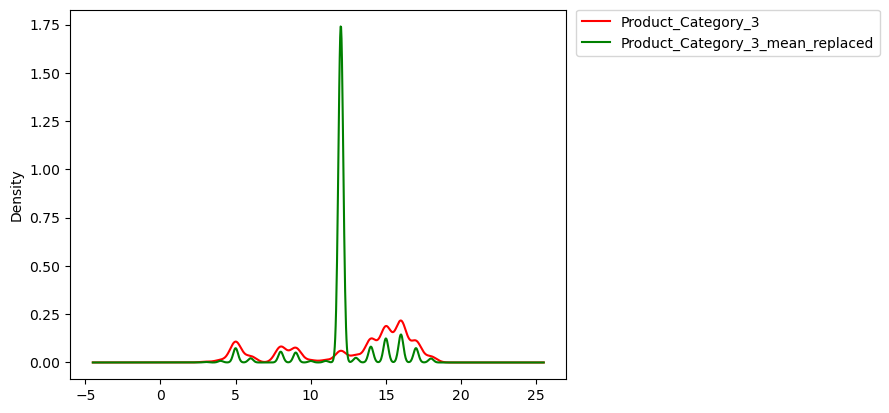

In [71]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_3'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_3') # before filling null values
df['Product_Category_3_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

# Use Median for missing values

In [66]:
median_value=int(df['Product_Category_3'].median())
median_value

14

In [78]:
replacement(df,'Product_Category_3',median_value,'_median')     #call the function

In [73]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,Product_Category_2_mode_replaced,Product_Category_3_mean_replaced,Product_Category_3_median_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370,8.0,12.0,12.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,15200,6.0,14.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422,8.0,12.0,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,NaN,1057,14.0,12.0,12.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969,8.0,12.0,12.0


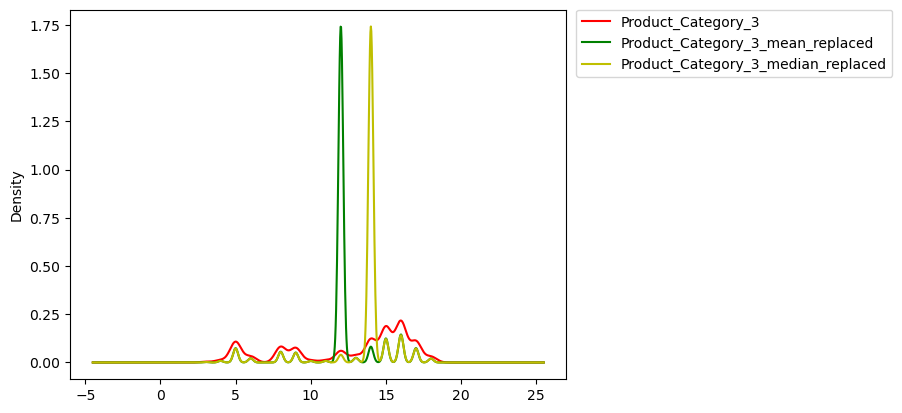

In [79]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_3'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_3') # before filling null values
df['Product_Category_3_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_3_mean_replaced')# after filling null values with mean value
df['Product_Category_3_median_replaced'].plot(kind='kde',ax=ax,color='y',legend='Product_Category_3_median_replaced')# after filling null values with median value
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

# Use mode ffor missing values

In [67]:
mmode_value=int(df['Product_Category_3'].mode())
mode_value

8

In [80]:
replacement(df,'Product_Category_3',mode_value,'_mode')     #call the function

In [81]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,Product_Category_2_mode_replaced,Product_Category_3_mean_replaced,Product_Category_3_median_replaced,Product_Category_3_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370,8.0,12.0,14.0,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,15200,6.0,14.0,14.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422,8.0,12.0,14.0,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,NaN,1057,14.0,12.0,14.0,8.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969,8.0,12.0,14.0,8.0


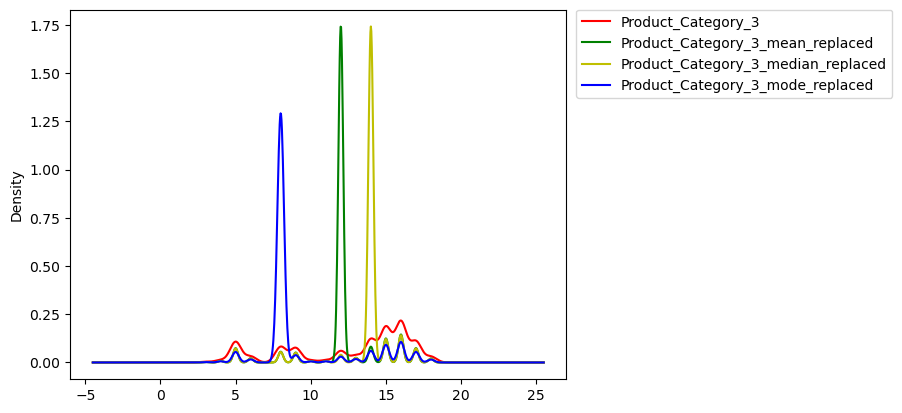

In [82]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_3'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_3') # before filling null values
df['Product_Category_3_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_3_mean_replaced')# after filling null values with mean value
df['Product_Category_3_median_replaced'].plot(kind='kde',ax=ax,color='y',legend='Product_Category_3_median_replaced')# after filling null values with median value
df['Product_Category_3_mode_replaced'].plot(kind='kde',ax=ax,color='b',legend='Product_Category_3_mode_replaced')# after filling null values with mode value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [68]:
#now we find std 

In [83]:
print('original column std = ',df['Product_Category_3'].std())
print('mean std = ',df['Product_Category_3_mean_replaced'].std())
print('median std = ',df['Product_Category_3_median_replaced'].std())
print('mode std = ',df['Product_Category_3_mode_replaced'].std())


original column std =  4.125337631573313
mean std =  2.2925019694270112
median std =  2.35286311541364
mode std =  3.125050876787113


here we see that the standard deviation of mode is more close to the standard deviation of original column. So we replace all the null values with mode and drop remaning column

In [84]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,Product_Category_2_mode_replaced,Product_Category_3_mean_replaced,Product_Category_3_median_replaced,Product_Category_3_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370,8.0,12.0,14.0,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,15200,6.0,14.0,14.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422,8.0,12.0,14.0,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,NaN,1057,14.0,12.0,14.0,8.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969,8.0,12.0,14.0,8.0


In [85]:
df=df.drop(['Product_Category_3','Product_Category_3_mean_replaced','Product_Category_3_median_replaced'],axis=1)

In [86]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_Category_2_mode_replaced,Product_Category_3_mode_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8.0,8.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,8.0,8.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,14.0,8.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,8.0,8.0


In [87]:
# In this way we replace missing values with the help od mean, median and mode